In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Variation characteristics of Particulate Matter in Changping. (PM2.5)

2. In the whole year of 2016, what is the proportion of days with good air quality (PM2.5<=100) and the worst air quality (PM2.5>300)?

3. In the whole year of 2015, what is the proportion of the days with good air quality (PM2.5<=100) and the worst air quality (PM2.5>300)? By Question 2&3, How does 2015 compare to 2016?

4. What is the relationship between air quality and seasonal (month) changes?

5. Comparing 2016 with 2015 at the same time, how often was the air quality better or worse?

6. Pollutants and meteorological environment correlation coefficients in Changping.

7. The fluctuation of SO2 content around Changping over time.

8. PM2.5 vs. CO

9. PM2.5 vs. NO2

10. SO2 boxplot


In [2]:
# Load Dataset
import zipfile
from urllib.request import urlopen
import shutil
import os

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip'
file_name = 'PRSA2017_Data_20130301-20170228.zip'

# extracting zipfile from URL
with urlopen(url) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

    # extracting required file from zipfile
    with zipfile.ZipFile(file_name) as zf:
        zf.extract('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')

# deleting the zipfile from the directory
os.remove('PRSA2017_Data_20130301-20170228.zip')

# loading data from the file
df = pd.read_csv('PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


In [3]:
# Check NaN
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [4]:
# Data cleaning & preparation
df = df.interpolate()

pmseries = df.copy()
pmseries['date'] = df[['month', 'day', 'hour', 'year']].astype(str).agg('-'.join, axis=1)
pmseries['date'] = pd.to_datetime(pmseries['date'], format='%m-%d-%H-%Y')

pm25 = pd.DataFrame(df, columns=['year', 'month', 'PM2.5'])

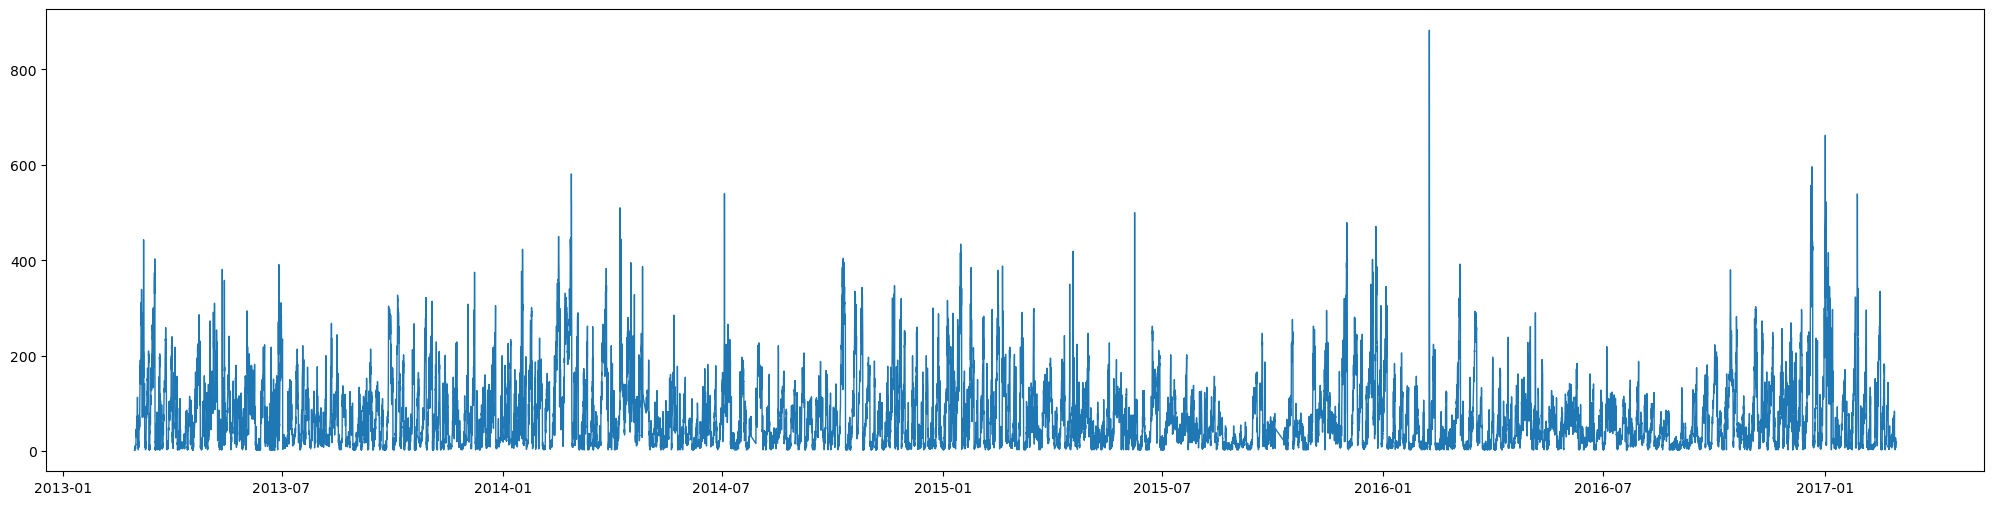

In [5]:
# 1 PM2.5 line plot
plt.figure(figsize=(25, 6))
plt.plot(pmseries['date'], pmseries['PM2.5'], linewidth=1)

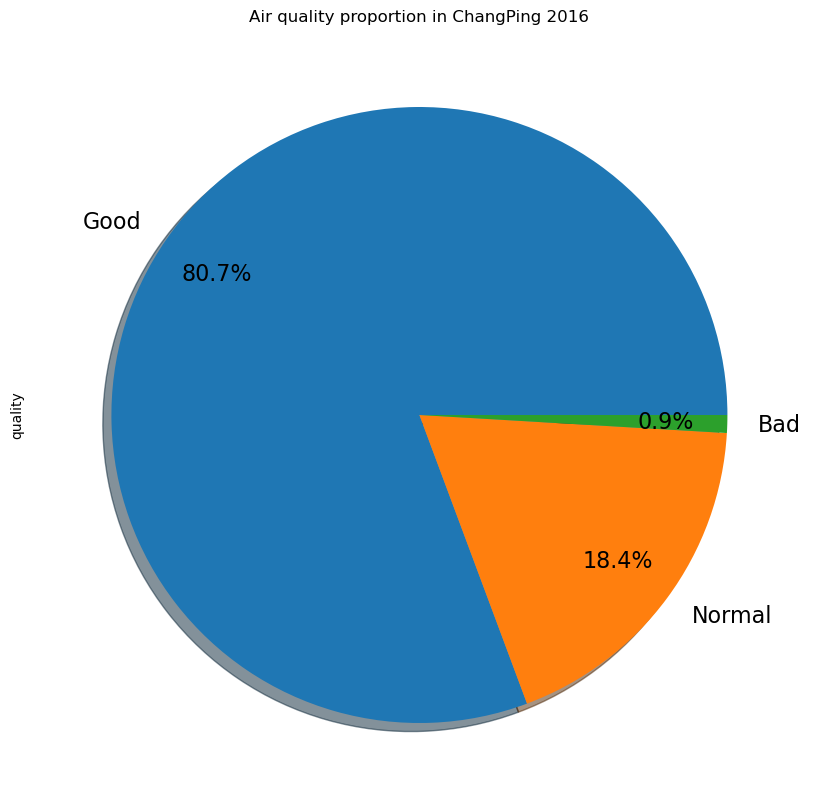

In [6]:
# 2 2016 Air quality pie chart
from capstone_group8 import pmPie
pmPie(df, 2016)

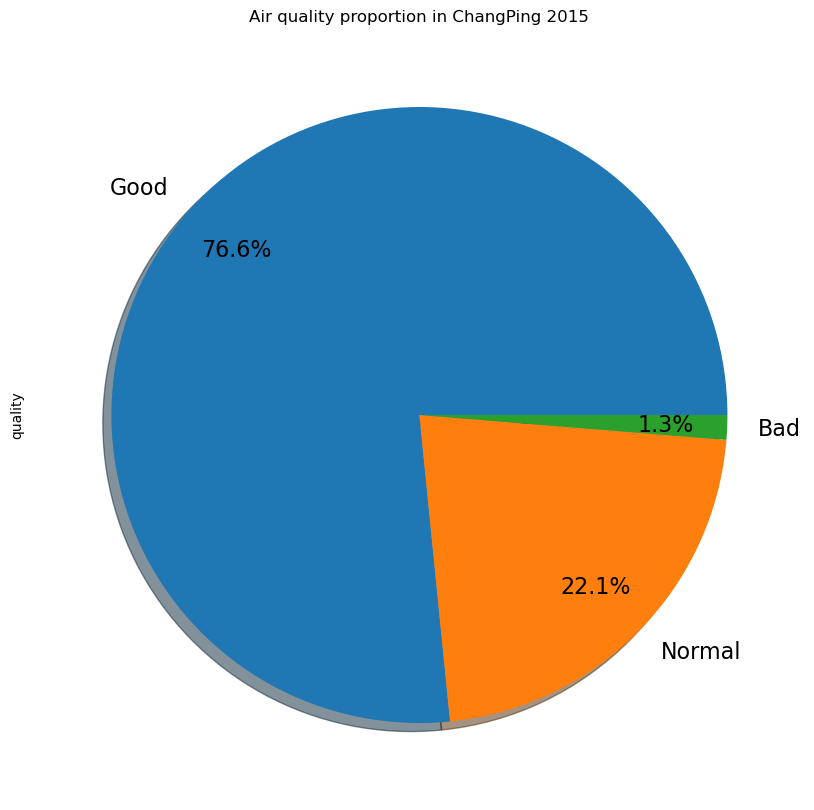

In [7]:
# 3 2015 Air quality pie chart
pmPie(df, 2015)

<AxesSubplot:xlabel='month', ylabel='PM2.5'>

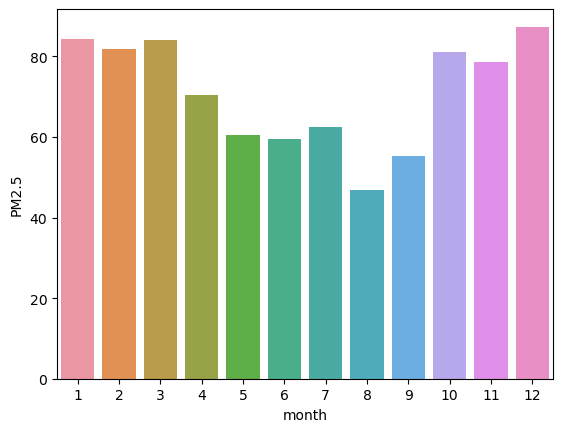

In [8]:
# 4 What is the relationship between air quality and seasonal (month) changes?
pmseason = df.copy()
pmseason = pmseason.groupby(['month']).agg({'PM2.5':np.mean}).reset_index()
sns.barplot(data=pmseason, x="month", y="PM2.5")

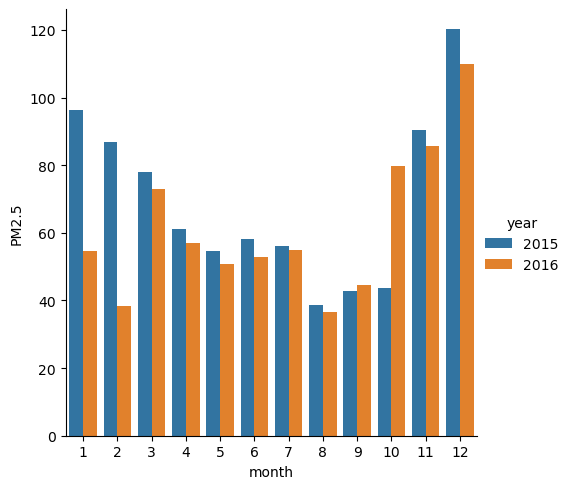

In [9]:
# 5 Comparing 2016 with 2015 at the same time, how often was the air quality better or worse?
pm15 = df.copy()
pm15 = pm15[pm15['year']==2015]
pm16 = df.copy()
pm16 = pm16[pm16['year']==2016]
pm15 = pm15.groupby(['month']).agg({'PM2.5':np.mean}).reset_index()
pm16 = pm16.groupby(['month']).agg({'PM2.5':np.mean}).reset_index()

pm1516 = pd.concat([pm15, pm16], axis=0, ignore_index=True)
pm1516['year'] = (len(pm15)*(2015,) + len(pm16)*(2016,))
sns.catplot(x='month', y='PM2.5', hue='year', kind='bar', data=pm1516)

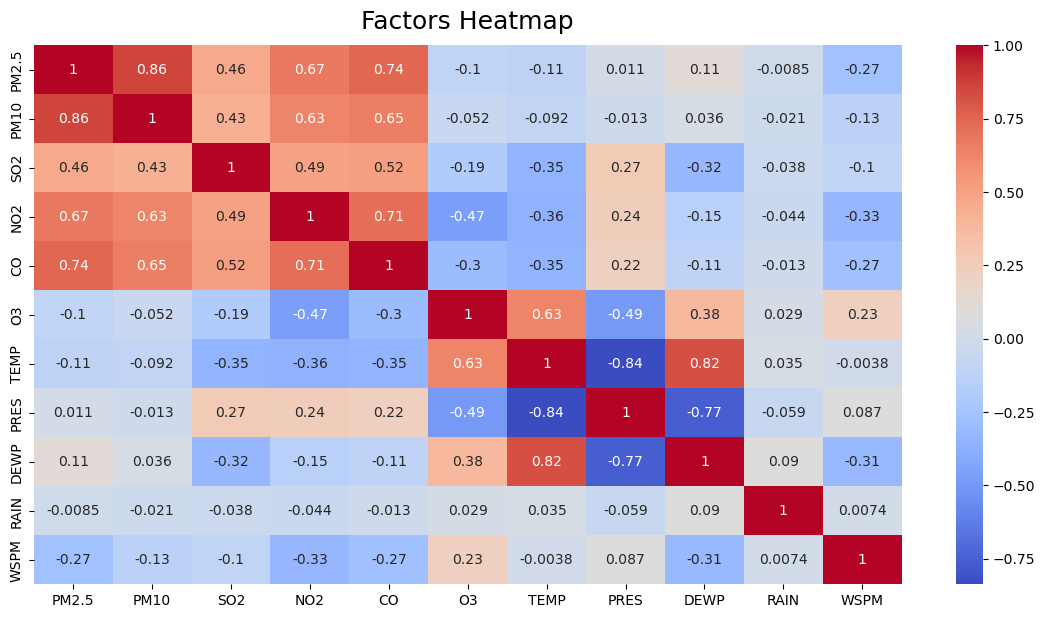

In [10]:
# 6 Pollutants and meteorological environment correlation coefficients in Changping.
htmapdf = pd.DataFrame(df, columns=['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM'])
plt.figure(figsize=(14, 7))
htmp = sns.heatmap(htmapdf.corr(), annot=True, cmap='coolwarm')
htmp.set_title('Factors Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

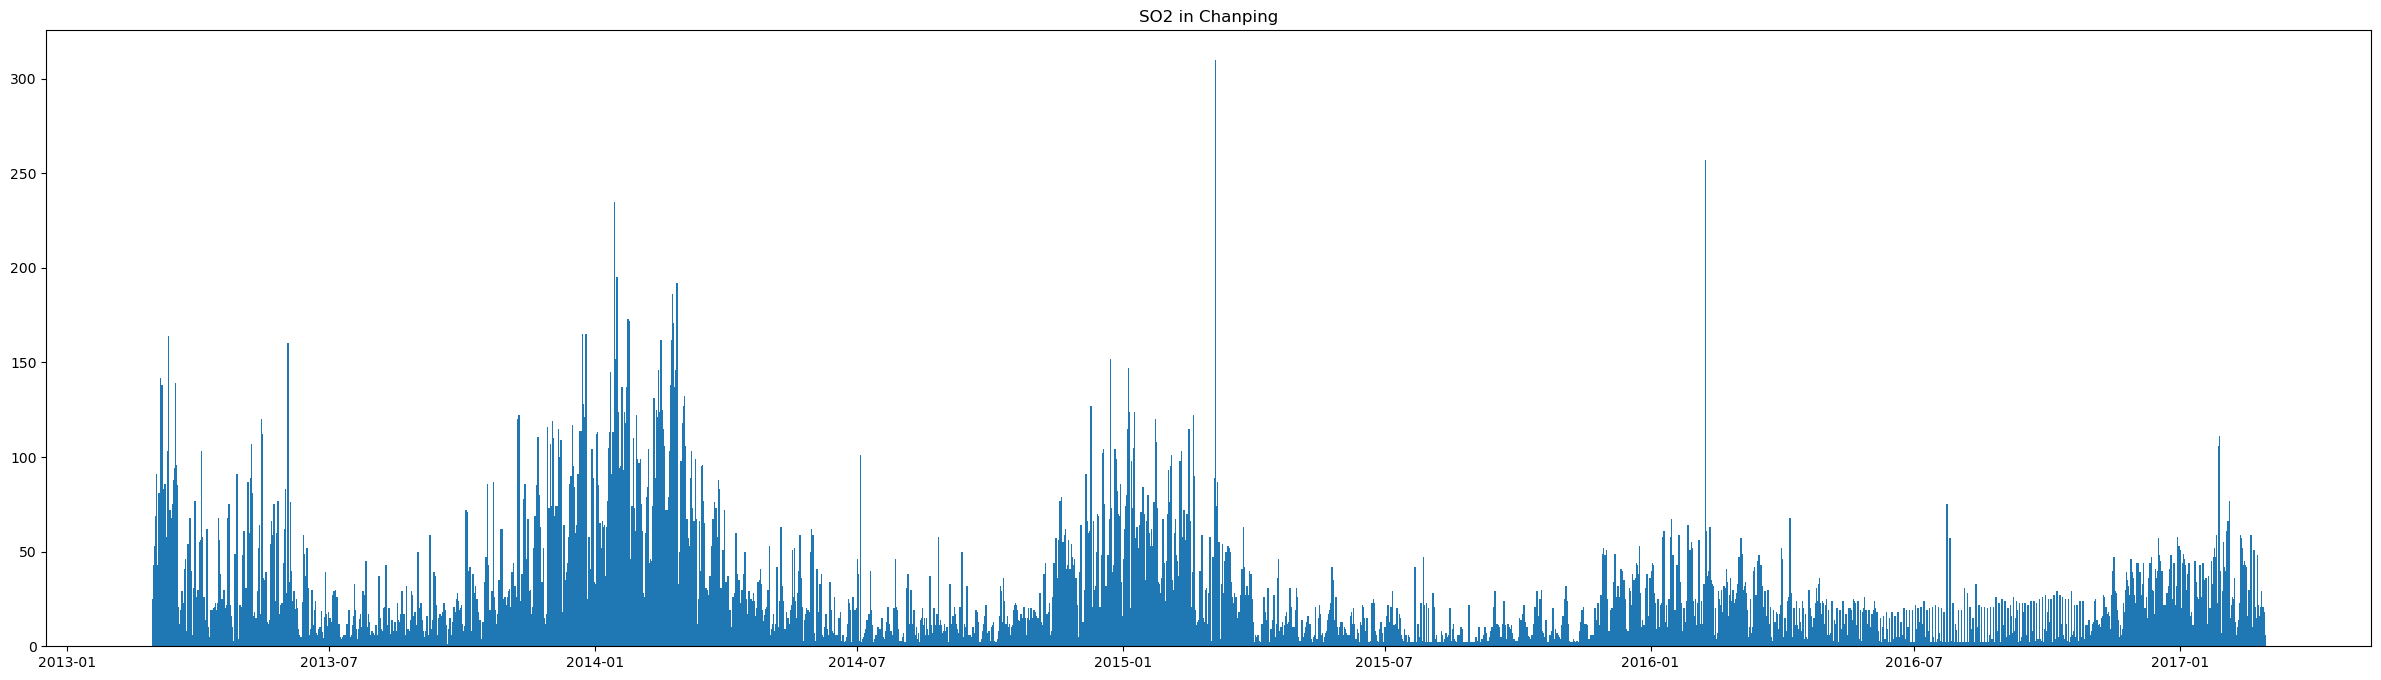

In [11]:
# 7 The fluctuation of SO2 content around Changping over time.
plt.figure(figsize=(30,8))
plt.bar(x=pmseries['date'],
         height=pmseries['SO2'],
         width=1)
plt.title('SO2 in Chanping')
plt.show()

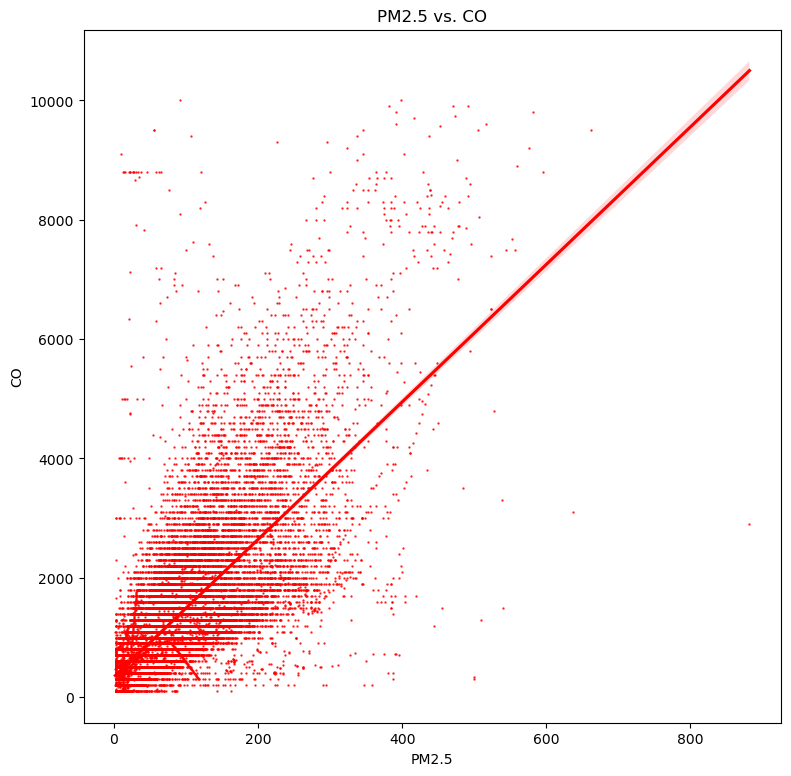

In [12]:
# 8 PM2.5 vs. CO
plt.figure(figsize=(9,9))
sns.regplot(data=df, x="PM2.5", y="CO", color='red', scatter_kws={'s':0.5}, ci=90)
plt.title('PM2.5 vs. CO')
plt.show()

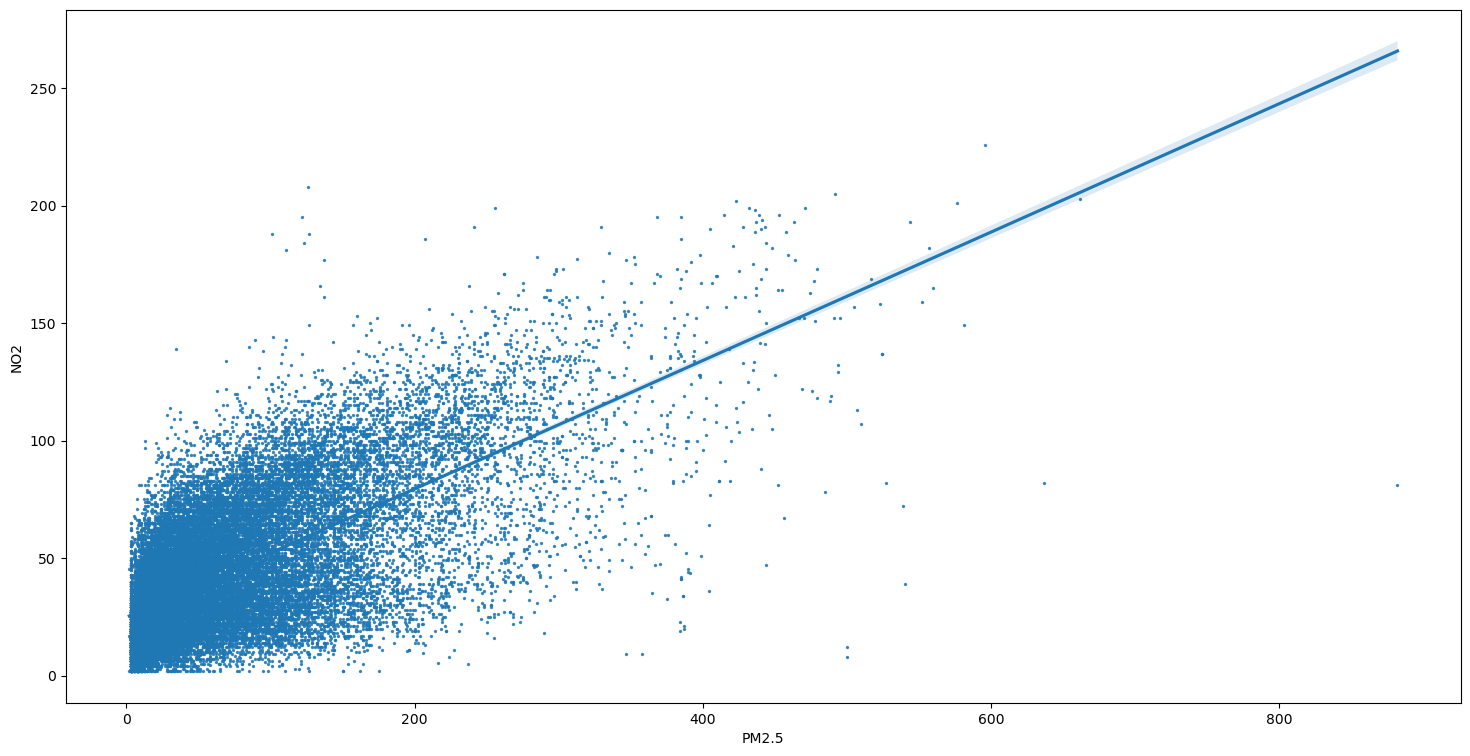

In [13]:
# 9 PM2.5 vs. NO2
plt.figure(figsize=(18,9))
sns.regplot(data=df, x="PM2.5", y="NO2", scatter_kws={'s':2})
plt.show()

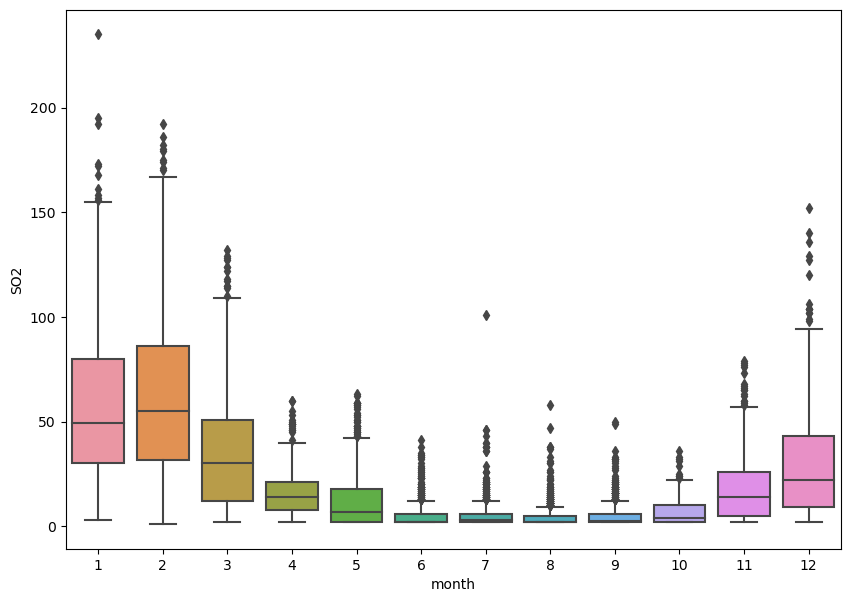

In [14]:
# 10 SO2 boxplot
so2014 = pmseries.copy()
so2014 = so2014[so2014['year'] == 2014]
fig = plt.figure(figsize =(10, 7))
sns.boxplot(y=so2014['SO2'], x=so2014['month'])
plt.show()

Intercept:  330.05545967837645
Cofficient:  [11.65488163]
0.5602290701573086
0.5316984725073972


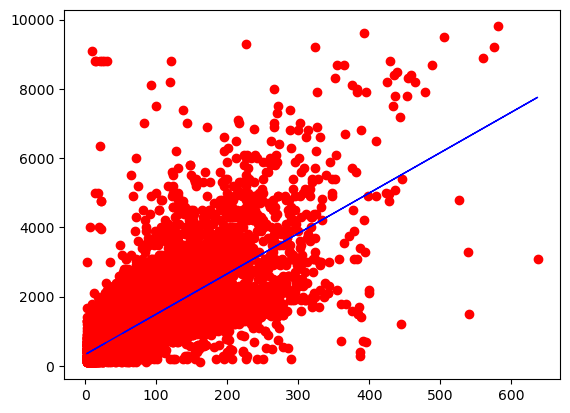

In [15]:
# Linear regression model
from capstone_group8 import linear_regression
linear_regression(df)

RMSE: 51.513740752491


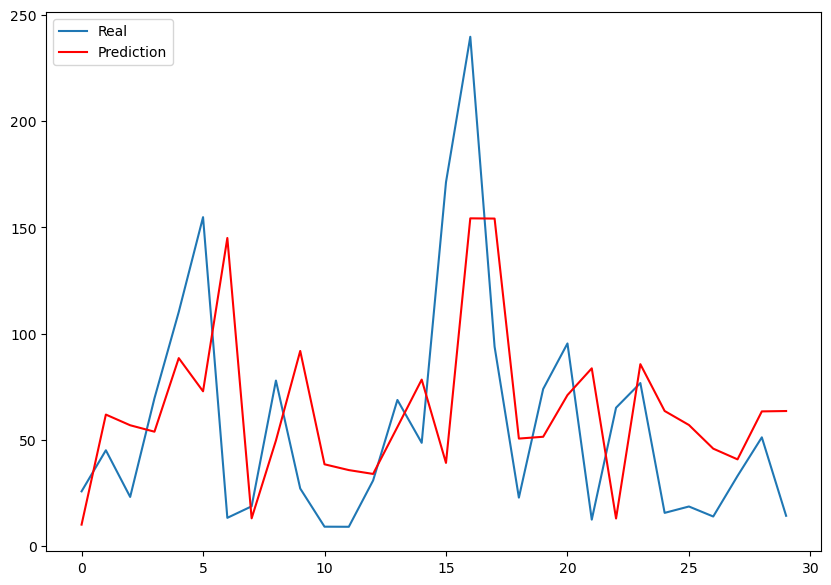

In [16]:
# Autoregressive model
from capstone_group8 import autoreg
autoreg(pmseries, 30)